In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#Visualization
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#EDA
from collections import Counter
from pydantic_settings import BaseSettings
import ydata_profiling as pp
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

In [24]:
import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.style.use('ggplot')

In [25]:
#import dataset
heart_df = pd.read_csv(r'C:\Users\ethan\Downloads\heart_disease_health_indicators_BRFSS2015.csv')
heart_df = heart_df.drop(['AnyHealthcare', 'NoDocbcCost', 'Education', 'Income', 'CholCheck'], axis = 1)

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming 'heartdisease' is your target variable
x = heart_df.drop('HeartDiseaseorAttack', axis=1)
y = heart_df['HeartDiseaseorAttack']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the linear regression model
model = LinearRegression()

# Perform Recursive Feature Elimination (RFE) to select features
rfe = RFE(model, n_features_to_select=5)  # Adjust the number of features as needed
rfe.fit(x_train_scaled, y_train)

selected_features = x.columns[rfe.support_]

# Train the model with the selected features
model.fit(x_train_scaled[:, rfe.support_], y_train)

# Predict on the test set
y_pred = model.predict(x_test_scaled[:, rfe.support_])

# Evaluate the model
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test_scaled.shape[1] - 1)
mse = mean_squared_error(y_test, y_pred)
aic = len(y_test) * np.log(mse) + 2 * x_test_scaled.shape[1]
bic = len(y_test) * np.log(mse) + x_test_scaled.shape[1] * np.log(len(y_test))

print(f"Selected features: {selected_features}")
print(f"Adjusted R^2: {adj_r2}")
print(f"R^2: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")

Selected features: Index(['Stroke', 'GenHlth', 'DiffWalk', 'Sex', 'Age'], dtype='object')
Adjusted R^2: 0.1352900005502663
R^2: 0.1355626990816785
Mean Squared Error: 0.07360255740567775
AIC: -132342.05489733905
BIC: -132200.7046413906


              Feature  Importance
2                 BMI    0.279326
15                Age    0.126533
12           PhysHlth    0.117599
11           MentHlth    0.089573
10            GenHlth    0.076728
7              Fruits    0.037956
6        PhysActivity    0.035111
5            Diabetes    0.032093
8             Veggies    0.032020
13           DiffWalk    0.028891
0              HighBP    0.028835
4              Stroke    0.028317
14                Sex    0.025495
3              Smoker    0.025315
1            HighChol    0.025263
9   HvyAlcoholConsump    0.010946


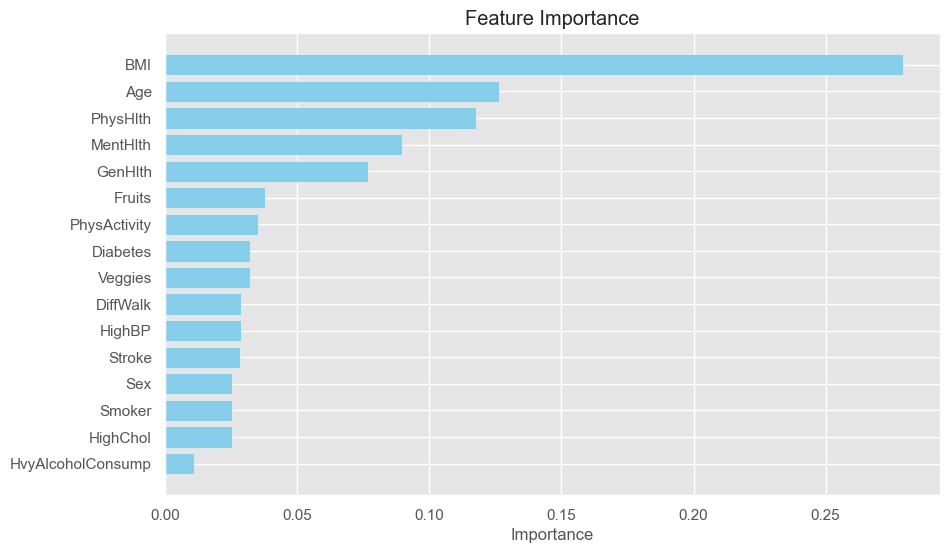

In [27]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Assuming 'heart_df' is your DataFrame with predictor variables and 'HeartDiseaseorAttack' is the target variable
x = heart_df[['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']]
y = heart_df['HeartDiseaseorAttack']

# Initialize Random Forest classifier
rf = RandomForestClassifier()

# Fit the model to the data
rf.fit(x, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_importance_df)

import matplotlib.pyplot as plt

# Assuming 'feature_importance_df' contains the DataFrame with feature importances
# You can use the code snippet from the previous response to create 'feature_importance_df'

# Plotting the feature importances as a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a DataFrame 'data' with predictor variables
# Select numerical predictor variables (assuming they are already encoded)
numerical_vars = heart_df[['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']]

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = numerical_vars.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_vars.values, i) for i in range(numerical_vars.shape[1])]

# Display VIF values
print(vif_data)

             Variable        VIF
0              HighBP   2.279227
1            HighChol   2.035414
2                 BMI  12.205300
3              Smoker   1.920602
4              Stroke   1.105457
5            Diabetes   1.386874
6        PhysActivity   4.142096
7              Fruits   2.981464
8             Veggies   5.382178
9   HvyAlcoholConsump   1.078079
10            GenHlth  10.108702
11           MentHlth   1.435554
12           PhysHlth   1.992900
13           DiffWalk   1.785858
14                Sex   1.833325
15                Age   8.138924


In [30]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'heart_df' is your DataFrame with predictor variables and 'HeartDiseaseorAttack' is the target variable
x = heart_df[['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']]
y = heart_df['HeartDiseaseorAttack']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Fit Lasso regression model
lasso = Lasso(alpha=0.01)  # Adjust alpha as needed for regularization strength
lasso.fit(x_train_scaled, y_train)

# Get feature coefficients and identify selected features
lasso_coefs = pd.DataFrame({'Feature': x.columns, 'Coefficient': lasso.coef_})
selected_features = lasso_coefs[lasso_coefs['Coefficient'] != 0]['Feature']

# Filter X_train and X_test to include only selected features
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

# Train a model using selected features (e.g., logistic regression)
# Replace 'YourModel' with the model you want to use, such as LogisticRegression, RandomForestClassifier, etc.
model = LogisticRegression()
model.fit(x_train_selected, y_train)

# Evaluate

LogisticRegression()

In [35]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Assuming 'heart_df' is your DataFrame with predictor variables and 'HeartDiseaseorAttack' is the target variable
x = heart_df[['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']]
y = heart_df['HeartDiseaseorAttack']

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Fit the model to the data
log_reg.fit(x, y)

# Get coefficients (weights) for predictor variables
coefficients = log_reg.coef_[0]

# Create a DataFrame to store coefficients and corresponding predictor variables
coefficients_df = pd.DataFrame({'Predictor_Variable': x.columns, 'Coefficient': coefficients})

# Sort coefficients by absolute value (optional)
coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Print coefficients
print(coefficients_df)

   Predictor_Variable  Coefficient  Absolute_Coefficient
4              Stroke     1.110706              1.110706
9   HvyAlcoholConsump    -0.814256              0.814256
1            HighChol     0.711591              0.711591
14                Sex     0.692602              0.692602
0              HighBP     0.530747              0.530747
10            GenHlth     0.479267              0.479267
3              Smoker     0.430810              0.430810
5            Diabetes     0.241793              0.241793
15                Age     0.237020              0.237020
13           DiffWalk     0.124037              0.124037
7              Fruits    -0.122841              0.122841
8             Veggies     0.014835              0.014835
6        PhysActivity     0.012939              0.012939
2                 BMI    -0.005263              0.005263
12           PhysHlth     0.005063              0.005063
11           MentHlth     0.003791              0.003791


In [37]:
import numpy as np

# Define coefficients obtained from logistic regression model
coefficients = np.array([0.530747, 0.711591, -0.005263, 0.430810, 1.110706, 0.241793, 0.012939, -0.122841, 0.014835, -0.814256, 0.479267, 0.003791, 0.005063, 0.124037, 0.692602, 0.237020])  # Coefficients for predictor variables

# Define logistic function (sigmoid function)
def logistic_function(x, coefficients):
    z = np.dot(x, coefficients)  # Calculate the weighted sum of predictor variables and coefficients
    return 1 / (1 + np.exp(-z))  # Apply the logistic function to get probability

# Example predictor variables for your dataset (should be standardized if necessary)
# Replace this with your actual predictor variable values
user = np.array([1, 1, 40, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 13])  # Example values for sample 1

# Calculate probability of binary variable occurring for the sample
probability = logistic_function(user, coefficients) * 100

print(f"You have {probability:.2f}% chance of developing heart disease in the next 10 years.")

You have 99.87% chance of developing heart disease in the next 10 years.
